In [11]:
import pandas as pd
import fnmatch
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib
%matplotlib inline

In [116]:
df = pd.read_csv("final_dataset.csv")
df

,Unnamed: 0,Region,Antal,/100 000 inv,Date,Location,Snow_days
0,0,Gotlands län,..,..,1998-12,Forse,21
1,1,Gotlands län,..,..,1998-12,Hejnum,15
2,2,Gotlands län,..,..,1998-12,Hemse,5
3,3,Gotlands län,..,..,1998-12,Hoburg D,4
4,4,Gotlands län,..,..,1998-12,Sanda,9
...,...,...,...,...,...,...,...
33622,33622,Östergötlands län,41,9,2013-03,Tjällmo D,31
33623,33623,Östergötlands län,41,9,2013-03,Vadstena D,4
33624,33624,Östergötlands län,41,9,2013-03,Åkroken D,31
33625,33625,Östergötlands län,41,9,2013-03,Ödeshög D,16


In [108]:
small_set = df.sample(n=10000, random_state=1)
small_set

,Unnamed: 0,Region,Antal,/100 000 inv,Date,Location,Snow_days
25250,25250,Jämtlands län,8,6,2013-10,Tullus D,0
30583,30583,Värmlands län,23,8,2012-01,Persberg,26
3922,3922,Dalarnas län,34,12,2010-11,Idre D,18
13876,13876,Norrbottens län,5,2,2001-03,Kätkesuando,1
18444,18444,Jämtlands län,4,3,2003-10,Marby D,8
...,...,...,...,...,...,...,...
1530,1530,Värmlands län,26,10,2007-10,Storbron,0
2468,2468,Gävleborgs län,31,11,2004-12,Lobonäs D,21
32965,32965,Västernorrlands län,22,9,1996-11,Sollefteå,2
30999,30999,Västernorrlands län,20,8,2005-01,Ullånger,31


In [124]:
prev_date = ""
prev_region = ""
snow_count = 0
crime_count = 0
max_index = df.shape[0]-1

data = []

for i, row in df.iterrows():
    
    curr_region = row['Region']
    curr_date = row['Date']
    crime = row['Antal']
    snow = row['Snow_days']
    
    if(i == 0):
        prev_date = curr_date
        prev_region = curr_region
    
    if (prev_date != curr_date or prev_region != curr_region):
        converted_date = pd.to_datetime(prev_date, format='%Y-%m', errors='ignore')
        to_append = [prev_region, converted_date, crime_count, snow_count]
        data.append(to_append)
        
        prev_date = curr_date
        prev_region = curr_region
        
        snow_count = 0
        crime_count = crime
        snow_count = snow
    elif (i == max_index):
        to_append = [prev_region, prev_date, crime_count, snow_count]
        data.append(to_append)
    else:
        crime_count = crime
        snow_count = snow_count + snow
        
        
        
new_df = pd.DataFrame(data, columns=['region', 'date', 'crime_count', 'snow_count'])

/var/folders/cp/4l5cyd252gl8gyd90gw38swr0000gn/T/ipykernel_20920/3391619173.py:40: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  new_df = pd.DataFrame(data, columns=['region', 'date', 'crime_count', 'snow_count'])


In [125]:
#.sort_values(by='crime_count', ascending=False).head(10)
new_df

,region,date,crime_count,snow_count
0,Gotlands län,1998-12-01,..,62
1,Gotlands län,2002-10-01,..,2
2,Gotlands län,2007-11-01,..,42
3,Gotlands län,2011-11-01,..,0
4,Gotlands län,2012-02-01,..,154
...,...,...,...,...
2469,Östergötlands län,2008-03-01,40,141
2470,Östergötlands län,2010-01-01,38,531
2471,Östergötlands län,2010-03-01,38,424
2472,Östergötlands län,2012-12-01,38,496


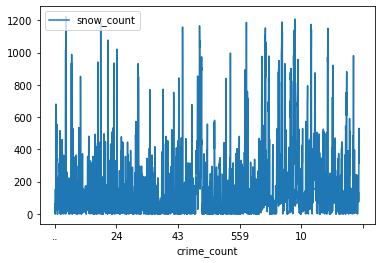

In [139]:
new_df.plot(kind='line', x="crime_count", y="snow_count");